In [20]:
import requests
import os
from tqdm import tqdm  # For progress bar (optional)

# URL of the MET Office historic station data page
url = 'https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data'

# Directory to save downloaded files
output_dir = 'MET_Office_Data'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract text data file URLs from the response content
    file_urls = [line.split('"')[1] for line in response.text.splitlines() if '.txt' in line]

    # Download each text data file
    for file_url in tqdm(file_urls, desc="Downloading files", unit="file"):
        # Check if the URL has a valid scheme
        if file_url.startswith(('http://', 'https://')):
            # Extract filename from the URL
            filename = file_url.split('/')[-1]
            # Download the file
            with open(os.path.join(output_dir, filename), 'wb') as f:
                f.write(requests.get(file_url).content)
        else:
            print(f"Skipping invalid URL: {file_url}")
else:
    print("Failed to retrieve data. Status code:", response.status_code)


Skipping invalid URL: type


In [12]:
import os

# Directory containing the text files
input_dir = 'MET_Office_Data'

# Directory to save cleaned files
output_dir = 'NoHeader_MET_Office_Data'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each file in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
        
        # Determine the number of header lines
        header_length = 5 if 'sunshine data' in lines[4].lower() else 6
        
        # Remove header
        data = lines[header_length:]
        
        # Write cleaned data to a new file
        with open(os.path.join(output_dir, filename), 'w') as file:
            file.writelines(data)

print("Cleaning completed.")

Cleaning completed.


In [13]:
import os

# Directory containing the cleaned text files
input_dir = 'NoHeader_MET_Office_Data'

# Loop through each file in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(input_dir, filename), 'r') as file:
            lines = file.readlines()
        
        # Remove the second row (header)
        cleaned_lines = [lines[0]]  # Keep the first row
        cleaned_lines += lines[2:]  # Skip the second row
        
        # Write cleaned data back to the same file
        with open(os.path.join(input_dir, filename), 'w') as file:
            file.writelines(cleaned_lines)

print("Cleaning completed.")

Cleaning completed.


In [14]:
'''
Data Collection, Pre-processing and Handling (30 marks): Download the
MET historic data from all 36 weather stations in the UK. Select a monitoring
time period when your data from all your selected weather stations have been
consistently recorded. Clean the data from any special symbols, e.g. ‘*’ or ‘#’.
Visualise and handle missing data, for example by replacing any missing values
with a zero or the mean values from all stations for that year.
'''
# Assign directory with tilde (~)
import os
import pandas as pd

def convert_txt_to_csv(input_folder, output_folder):
    # Make sure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all text files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".txt"):
            input_filepath = os.path.join(input_folder, filename)
            output_filepath = os.path.join(output_folder, os.path.splitext(filename)[0] + ".csv")

            # Read the fixed-width format file
            df = pd.read_fwf(input_filepath)

            # Save the DataFrame to a CSV file
            df.to_csv(output_filepath, index=False)

#Usage of the function
input_folder = 'NoHeader_MET_Office_Data'
output_folder = 'DataAE1.csv'
convert_txt_to_csv(input_folder, output_folder)


/var/folders/c7/s4b91brd5951stsg2n86bh500000gn/T/ipykernel_65776/3289319095.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
import pandas as pd
import os

# Directory containing CSV files
input_directory = 'DataAE1.csv'
# Directory to save modified CSV files
output_directory = 'DataAE1csv.cleaned'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through all CSV files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        input_filepath = os.path.join(input_directory, filename)
        # Read CSV file into DataFrame
        df = pd.read_csv(input_filepath)
        # Replace '---' with 0
        df.replace('---', 0, inplace=True)
        # Save modified DataFrame to a new CSV file in the output directory
        output_filepath = os.path.join(output_directory, f'cleaned_{filename}')
        df.to_csv(output_filepath, index=False)

/var/folders/c7/s4b91brd5951stsg2n86bh500000gn/T/ipykernel_65776/4012599526.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  avg_change_tmax = ((final_tmax - initial_tmax) / initial_tmax) * 100  # Calculate percentage change for tmax
/var/folders/c7/s4b91brd5951stsg2n86bh500000gn/T/ipykernel_65776/4012599526.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  avg_change_tmin = ((final_tmin - initial_tmin) / initial_tmin) * 100  # Calculate percentage change for tmin


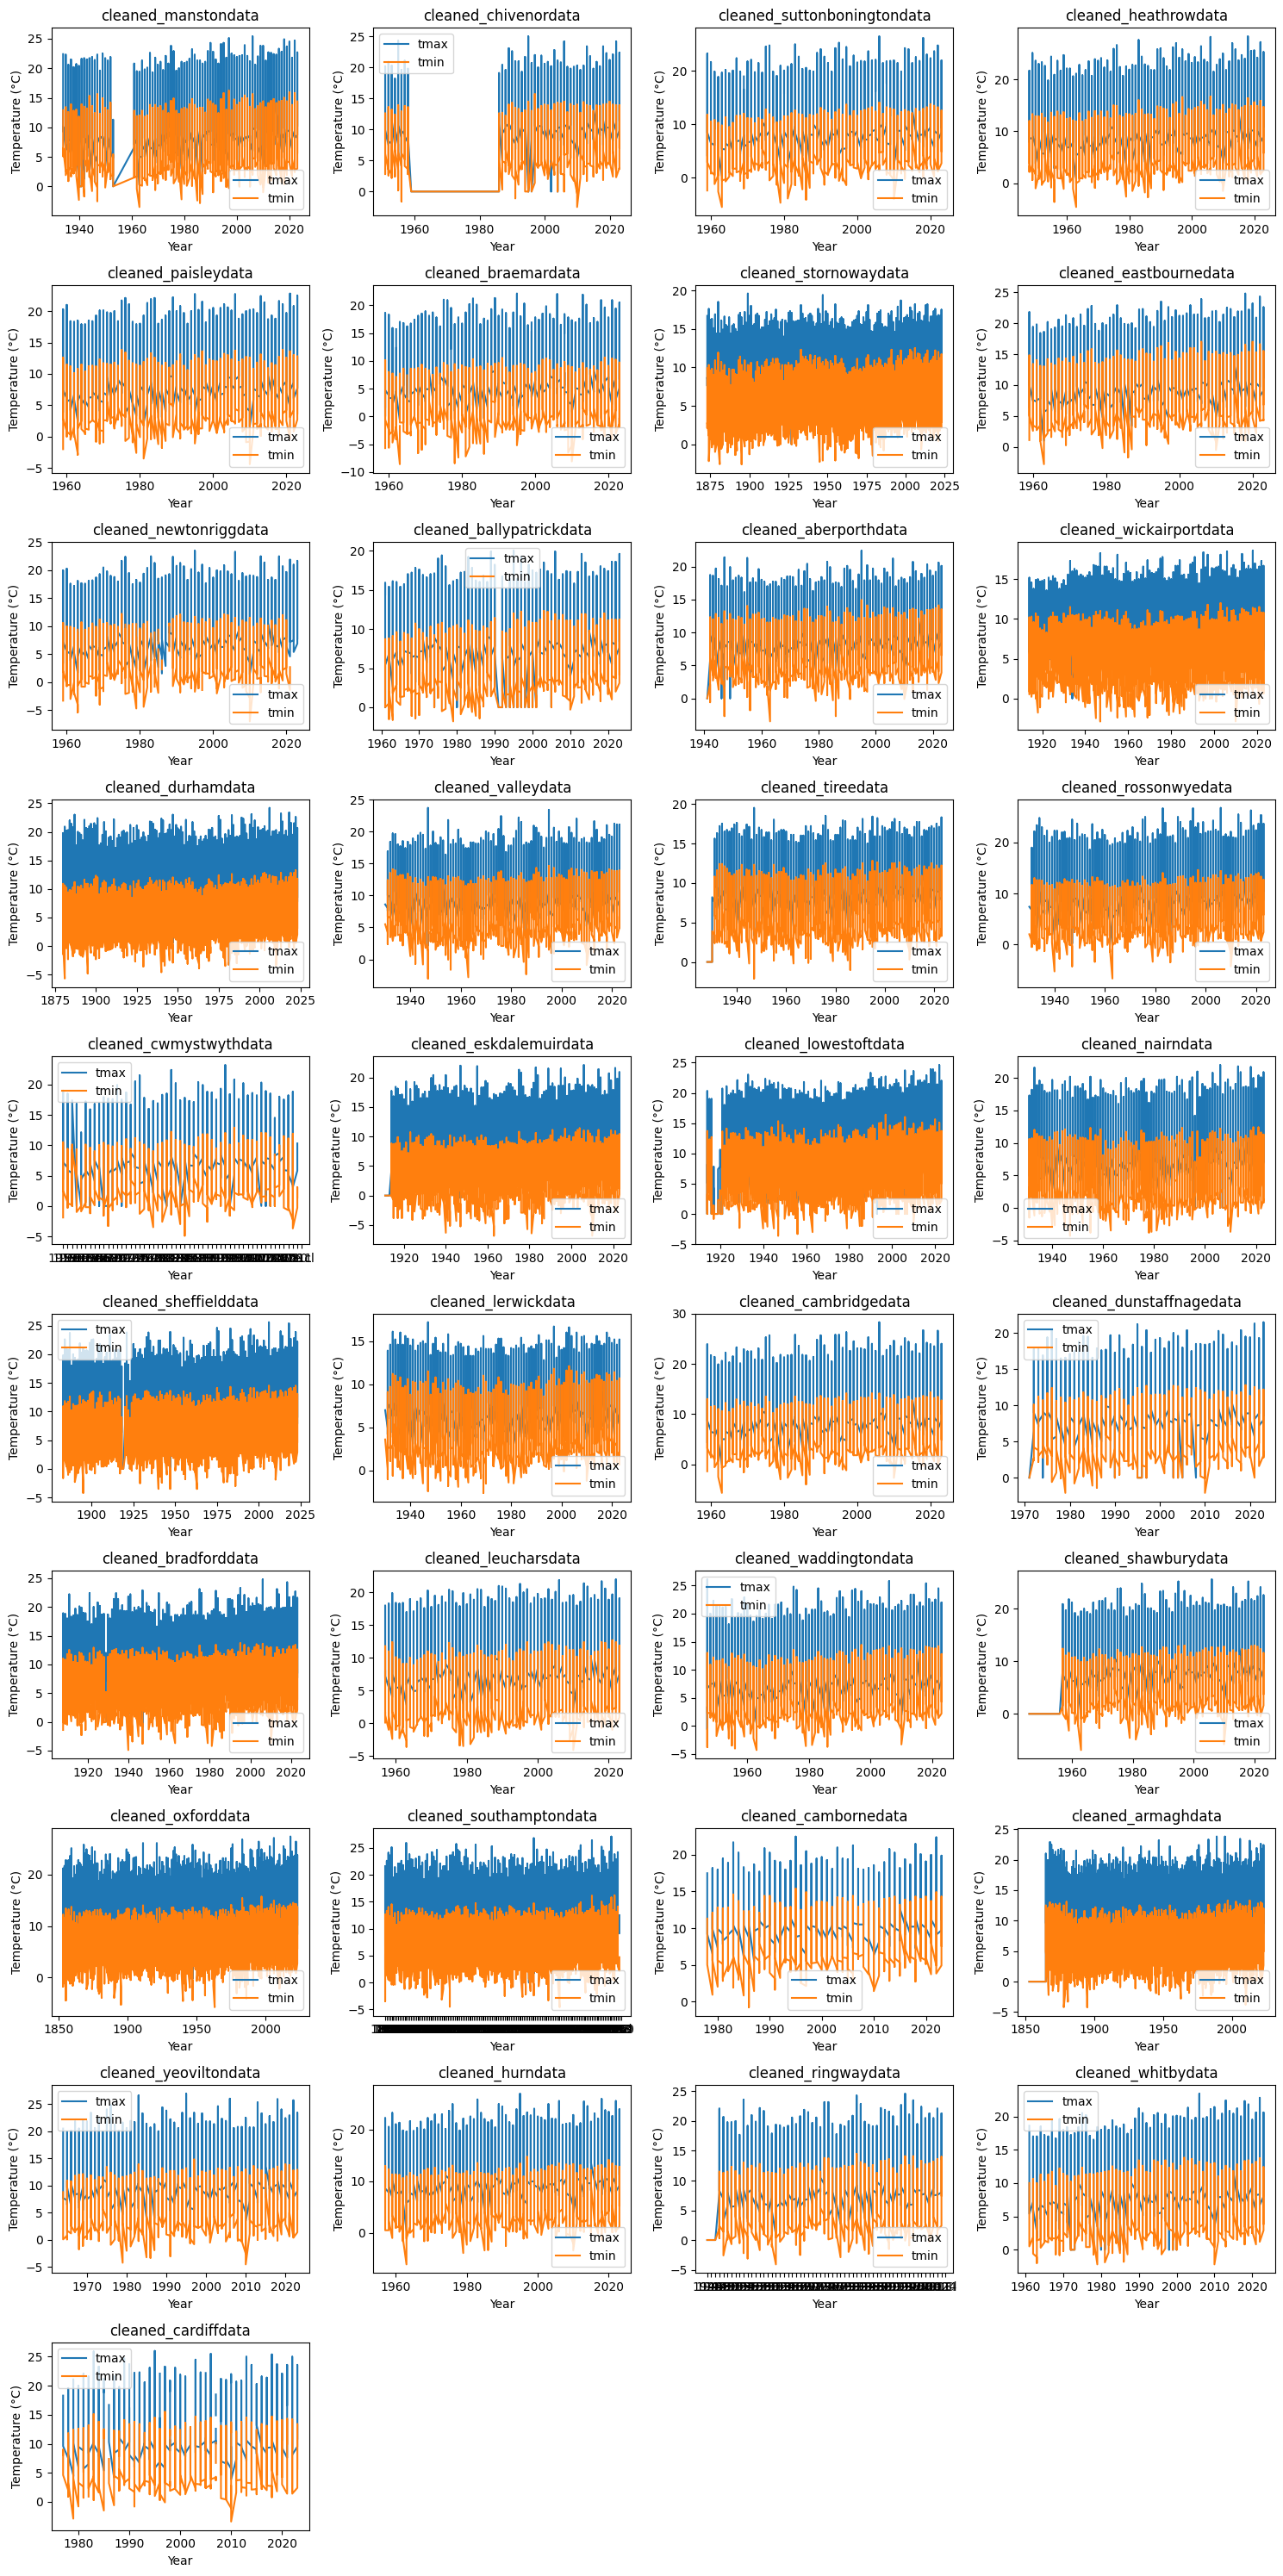

Station with greatest average temperature change: cleaned_aberporthdata
Station with lowest average temperature change: cleaned_waddingtondata


In [16]:
'''
part 2 Average Temperature Change (15 marks): Calculate for each station the
average temperature change to date as a percentage increase or decrease.
Determine the station with the greatest and lowest average temperature changes
and visualise the results over time using an appropriate plot.
'''
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing station data files
data_dir = 'DataAE1csv.cleaned'

# Load station data into a dictionary of DataFrames
station_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        station_name = os.path.splitext(filename)[0]
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        # Convert temperature columns to numeric types
        df['tmax'] = pd.to_numeric(df['tmax'], errors='coerce')
        df['tmin'] = pd.to_numeric(df['tmin'], errors='coerce')
        station_data[station_name] = df

# Calculate average temperature change for each station
station_avg_changes = {}
for station_name, df in station_data.items():
    initial_tmax = pd.to_numeric(df.iloc[0]['tmax'], errors='coerce')  # Initial maximum temperature
    final_tmax = pd.to_numeric(df.iloc[-1]['tmax'], errors='coerce')   # Final maximum temperature
    initial_tmin = pd.to_numeric(df.iloc[0]['tmin'], errors='coerce')  # Initial minimum temperature
    final_tmin = pd.to_numeric(df.iloc[-1]['tmin'], errors='coerce')   # Final minimum temperature
    avg_change_tmax = ((final_tmax - initial_tmax) / initial_tmax) * 100  # Calculate percentage change for tmax
    avg_change_tmin = ((final_tmin - initial_tmin) / initial_tmin) * 100  # Calculate percentage change for tmin
    avg_change = (avg_change_tmax + avg_change_tmin) / 2  # Average temperature change
    station_avg_changes[station_name] = avg_change

# Determine station with greatest and lowest average temperature changes
max_change_station = max(station_avg_changes, key=station_avg_changes.get)
min_change_station = min(station_avg_changes, key=station_avg_changes.get)

# Visualize temperature change trends over time for each station
num_stations = len(station_data)
num_cols = 4  # Number of columns in the subplot grid
num_rows = -(-num_stations // num_cols)  # Number of rows (ceiling division)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

for i, (station_name, df) in enumerate(station_data.items()):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].plot(df['yyyy'], df['tmax'], label='tmax')
    axs[row, col].plot(df['yyyy'], df['tmin'], label='tmin')
    axs[row, col].set_title(station_name)
    axs[row, col].set_xlabel("Year")
    axs[row, col].set_ylabel("Temperature (°C)")
    axs[row, col].legend()

# Hide empty subplots
for i in range(len(station_data), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Station with greatest average temperature change:", max_change_station)
print("Station with lowest average temperature change:", min_change_station)


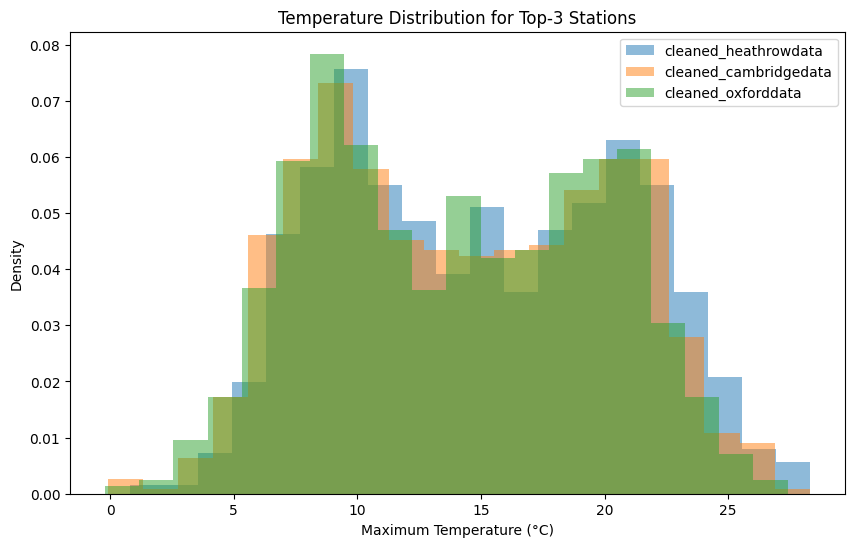

Station: cleaned_heathrowdata
Mean Temperature: 15.001754385964915
Median Temperature: 14.850000000000001
Standard Deviation: 5.806536797967424

Station: cleaned_cambridgedata
Mean Temperature: 14.377179487179488
Median Temperature: 14.149999999999999
Standard Deviation: 5.810399003406117

Station: cleaned_oxforddata
Mean Temperature: 13.988206627680313
Median Temperature: 13.850000000000001
Standard Deviation: 5.701008601450511



In [18]:
'''
Part 3:Station Rankings (15 marks): Rank the stations in descending order based on
the highest temperature. Summarise the temperature distribution in an
appropriate plot, including measures of central tendency and variance, for the
top-k stations
'''
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing station data files
data_dir = 'DataAE1csv.cleaned'

# Load station data into a dictionary of DataFrames
station_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        station_name = os.path.splitext(filename)[0]
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        # Convert temperature columns to numeric types
        df['tmax'] = pd.to_numeric(df['tmax'], errors='coerce')
        station_data[station_name] = df

# Extract maximum temperature for each station
station_max_temps = {station: df['tmax'].max() for station, df in station_data.items()}

# Rank stations based on highest temperature
ranked_stations = sorted(station_max_temps, key=station_max_temps.get, reverse=True)

# Top-k stations
top_k = 3  # Change this value as needed
top_k_stations = ranked_stations[:top_k]

# Plot temperature distribution for top-k stations
plt.figure(figsize=(10, 6))
for station in top_k_stations:
    plt.hist(station_data[station]['tmax'], bins=20, alpha=0.5, label=station, density=True)

plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Density")
plt.title("Temperature Distribution for Top-{} Stations".format(top_k))
plt.legend()
plt.show()

# Summarize temperature distribution statistics for top-k stations
for station in top_k_stations:
    temp_data = station_data[station]['tmax']
    mean_temp = temp_data.mean()
    median_temp = temp_data.median()
    std_temp = temp_data.std()
    print("Station:", station)
    print("Mean Temperature:", mean_temp)
    print("Median Temperature:", median_temp)
    print("Standard Deviation:", std_temp)
    print()

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing station data files
data_dir = 'DataAE1csv.cleaned'

# Load station data into a dictionary of DataFrames
station_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        station_name = os.path.splitext(filename)[0]
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        # Convert temperature columns to numeric types
        df['tmax'] = pd.to_numeric(df['tmax'], errors='coerce')
        df['tmin'] = pd.to_numeric(df['tmin'], errors='coerce')
        station_data[station_name] = df

# Identify anomalies in temperature data
anomalies = {}
for station_name, df in station_data.items():
    # Calculate temperature anomalies (e.g., differences from the mean or z-scores)
    # Here, we'll calculate z-scores for maximum temperatures
    z_scores = (df['tmax'] - df['tmax'].mean()) / df['tmax'].std()
    # Identify years with unusually high z-scores (threshold can be adjusted)
    anomaly_years = df.loc[z_scores > 2, 'yyyy']
    anomalies[station_name] = anomaly_years

# Discuss limitations in the context of climate change
for station_name, anomaly_years in anomalies.items():
    if not anomaly_years.empty:
        print("Station:", station_name)
        print("Years with Unusual High Temperatures:", anomaly_years.tolist())
        print("Limitations:")
        print("- Anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.")
        print("- Isolated anomalies in specific years or stations do not necessarily indicate broader climate change trends.")
        print("- Long-term climate analysis requires robust datasets, considering factors like urbanization, station relocation, and data quality.")
        print("- Climate change impacts often manifest as gradual shifts or changes in extreme events over extended periods.")
        print("- Anomalies should prompt further investigation rather than immediate conclusions about climate change.")
        print()

Station: cleaned_manstondata
Years with Unusual High Temperatures: [1997, 2006]
Limitations:
- Anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.
- Isolated anomalies in specific years or stations do not necessarily indicate broader climate change trends.
- Long-term climate analysis requires robust datasets, considering factors like urbanization, station relocation, and data quality.
- Climate change impacts often manifest as gradual shifts or changes in extreme events over extended periods.
- Anomalies should prompt further investigation rather than immediate conclusions about climate change.

Station: cleaned_suttonboningtondata
Years with Unusual High Temperatures: [1976, 1983, 1995, 1995, 2006, 2018, 2022]
Limitations:
- Anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.
- Isolated anomalies in specific years or stations do not necessarily indicate broader 

In [ ]:
'''5. Comparison with Other Sources (20 marks): Compare the similarities or
differences between the annual average temperature in the UK, as reported by
the MET Office, and the world annual average temperature data from other
sources such as NASA, the National Oceanic and Atmospheric Administration
(NOAA), or the World Meteorological Organization (WMO). Discuss the
implications and reliability of comparing data from different sources.